# Temperature Profile Optimization of the Brewing Process

Peter Chiang, Alex Davisson, Amelia Eginton, Jonathan Neupauer  
Final Project for CBE 30338, Spring 2017

## Part 1. Problem Statement
**Problem** 

One stage in the production of beer is the fermentation of wort. Fermentation is the process of yeast turning the glucose in wort into ethanol and carbon dioxide. It is an important part of the process because it determines the highly desirable properties of taste, aroma, and alcohol content. The process of fermentation releases both carbon dioxide and heat as byproducts. Depending on what category of beer the wort is being converted into, it is necessary to constantly control the temperature of the fermentation vessel. A controlled temperature will keep the product consistent between batches. The application of a mathematical model to the fermentation stage enables a controller to manipulate the reaction rates via temperature, so that the desired final composition can be obtained. For example, a lager must be kept at a much cooler temperature than an ale.  A simulation modeled the fermentation process and the effects of a temperature controller on the final composition. The uncontrolled fermentation of a lager and an ale acted as the control group. The results from these simulations were then compared to isothermally controlled simulations. In the case of a lager, an isothermal temperature profile was not always ideal, so three industrial temperature profiles were found. These industrial temperature profiles were simulated for a lager using setpoint changes and compared to the results from isothermal control.

**Technology Challenge**

The technological challenge that arose in this project was that a control process needed to be formulated for the nonlinear fermentation model. This was accomplished by using a discrete time approximation. In addition, two energy balances were derived. One for the uncontrolled fermentation vessel, where the temperature in the tank was a function of both the heat being released by the reaction and the energy being exchanged with the surroundings. The second energy balance modeled the temperature of the tank as a function of the heat being released by the reaction and the energy being consumed by the cooling jacket. The temperature of the cooling jacket was then a function of the energy that it was exchanging with the tank on one side and the surroundings on the other. These dynamics needed to be accurately modeled in order to create a robust simulation.

**Goals** 

The goal of this project was to determine if the use of a temperature controller improved the fermentation process of both a lager and an ale. For the case of a lager, an additional goal was to determine the optimal temperature profile. To determine the optimal results, the concentrations of biomass, sugar, ethanol, ethyl acetate, and diacetyl were recorded throughout the fermentation process. Ethanol determines the alcohol content of the beer, while ethyl acetate and diacetyl contribute to the flavor. Ethyl acetate gives beer a fruity aroma, a desirable quality for an ale, while diacetyl produces a buttery flavor (Rodman 256). As a threshold value, ethyl acetate must remain below 30 ppm, because this is the concentration at which the beer begins to have a solvent-like flavor. A typical beer has a concentration ranging from 10-20 ppm with an ale being on the higher side and a lager being on the lower side (Boulton). Diacetyl is not a desirable chemical in many beers because it is a sign of poor brewing conditions and it is hard to control the amount that will end up in each glass since it increases over time (de Piro). The ideal fermentation process for this model was one in which the model, when supplied with a specific amount of yeast and glucose, output a maximum level of ethanol, a moderate amount of ethyl acetate (depending on type of beer), and a minimal concentration of diacetyl acetate. Since all the simulations began with the same initial concentration of yeast and sugar, the goal of the experimenter was to maximize the ethanol production because this results in the most economical usage of raw materials. To lower the alcohol content, the initial concentration of sugar can be reduced.



## Part 2. Theoretical Development
**Model Overview**

This project models how the temperature of a fermentation vessel changes due to the energy output of the reaction of yeast and glucose. The goal is to maintain the temperature of the wort within a specific range through feedback control of a cooling jacket. The feedback-controlled model will then be compared to a model of a fermentation vessel without a cooling jacket to see if a significant difference in performance arises. In the case of fermenting a lager, several industrial temperature profiles have been developed where setpoint changes take place throughout the fermenation process. These industrial temperature profiles will be compared to an isothermal temperature profile. In each case, the steady state concentrations of the four major components- Sugar, Ethanol, Ethyl Acetate, and Diactyl- will be compared. 
 
**Model Equations**

The main governing equation for our model was the reaction between the glucose and the yeast. This reaction is both responsible for the concentration of ethanol in the beer as well as the temperature change in the fermentation vessel. The reaction is:
![](rxn.png)

Table 1 contains a summary of the variables that were used in the development of the modeling equations. 
       
                                                  Table 1: Variables 
| Parameter | Descriptiom | Units |
| :-------- | :---------: | :-----: |
| $\mu_{a}$ | Ethanol Production Rate | 1/hr|
| $\mu_{D}$ |Specific Yeast Settling Down Rate| g/L|
|$\mu_{eas}$ | Ethyl Acetate Coefficient Rate | g/L |
|$\mu_{lag}$ | Specific Rate of Latent Formation | 1/hr|
|$\mu_{s}$ | Subsrate Consumption Rate | 1/hr |
|$\mu_{x}$ | Specific Yeast Growth Rate | 1/hr |
|Acet | Ethyl Acetate Concentration | ppm |
|Diac | Diacetyl Concentration | ppm | 
|E | Ethanol Concentratin | g/L |
|f | Fermentation Inhibitor | g/L
|$k_{dc}$ | Diacetyl Appearance Rate | - |
|$k_{dm}$ | Diacetyl Reduction Rate | - |
|$k_{m}$ | Yeast Growth Inhibition Parameter | g/L|
|$k_{s}$ | Sugar Inhibition Parameter | g/L |
|S | Concentration of Sugar | g/L |
|$S_0$ | Initial Concentration of Sugar | g/L|
|t | Time | hr |
|T | Tank Temperature | Kelvin |
|$X_{active}$ | Suspended Active Biomass | g/L |
|$X_{dead}$| Suspended Dead Biomass | g/L |
|$X_{lag}$| Suspended Latent Biomass | g/L |
|$\Delta H_{rxn}$| Heat of Reaction | J/g-glucose|
|$C_p$| Specific Heat Capacity | J/g*K |
| U | Overall Heat transfer coefficient | J/m^2 *K * hr |
|A | Interfacial Contact Area | m^2 | 
|$q_c$ | cooling jacket flow rate | L/hr |
| V | Volume | L|


Two separate energy balances were constructed to model the system- one for the case of no cooling jacket and one for the case with a cooling jacket. Below is the energy balance for the fermenation vessel without a cooling jacket:

(1)$$ \frac{dT}{dt} = \frac{-\Delta H_{rxn}}{\rho_{wort} C_{p_{wort}}} \frac{dS}{dt} +  \frac{U_{amb}A_{amb}}{\rho_{wort} C_{p_{wort}} V} (T_{amb}-T) $$

With the additional jacket the energy balance becomes:
$$ \frac{dT}{dt} = \frac{-\Delta H_{rxn}}{\rho_{wort} C_{p_{wort}}} \frac{dS}{dt} +  \frac{U_{c}A_{c}}{\rho_{wort} C_{p_{wort}} V} (T_{c}-T) $$

$$ \frac{dT_c}{dt} = \frac{q_c}{V_c}(T_{amb}-T_c)  +  \frac{U_{amb}A_{amb}}{\rho_{water} C_{p_{water}} V_c} (T_{amb}-T_c) $$

The fermentation process was modeled using the equations outlined in “Optimal Control of a Fermentation Process” (Carrillo-Ureta).
The biomass, yeast, can be in three separate stages at any given time during the fermentation process. Yeast may either be in a lag state, an active state, or dead. The inoculum ($X_{inc}$) is composed of 50% dead cells, 48% lag cells, and 2% active cells. It is essential to know the amount of yeast in each state in order to accurately model the chemical reaction. 
Equation 2 is used to model the amount of yeast in the lag state in the fermentation vessel:

(2) $$ \frac{dX_{lag}}{dt} = -\mu_{lag}*X_{lag}$$

The purpose of Equation 3 is to model how many cells are in the active state at a given time. This is essential because the active cells are the yeast cells that are represented in the chemical reaction. The active cells are what convert glucose into ethanol, carbon dioxide, and ATP.

(3) $$ \frac{dX_{active}}{dt} = \mu_{X}*X_{active}-k_m*X_{active}+\mu_{lag}*X_{lag}$$

Glucose is the food source for the yeast. As it is being converted and the supply is exhausted the yeast cells begin to die. Equation 4 determines the rate at which the yeast cells are dying. 

(4) $$ \frac{dX_{dead}}{dt} = k_m*X_{active} - \mu_{D}*X_{dead}$$

As the yeast converts glucose into ethanol, carbon dioxide, and ATP, the concentration of glucose in the vessel decreases since it is a batch process. Equation 5 models the rate at which the glucose is decreasing in the system.

(5) $$\frac{dS}{dt}= - \mu_s * X_{active} $$

Equation 6 is used to determine the rate at which ethanol is produced from the reaction.

(6) $$\frac{dE}{dt}= \mu_a * f * X_{active} $$

The next two equations model two of the major flavor factors in beer, ethyl acetate and diacetyl. Equation 7 determines the amount of ethyl acetate present in the fermentation vessel. Ethyl acetate produces the fruity aroma common in most ales. 

(7) $$\frac{d(Acet)}{dt}= \mu_{eas} * \mu_s * X_{active} $$

Similarly, equation 8 determines how much diacetyl is present in the fermentation vessel. Diacetyl produces a buttery flavor, but it is often avoided by many brewers since it is difficult to maintain over time.

(8) $$\frac{d(Diac)}{dt}= k_{dc} * S* X_{active} - k_{dm} * Diac * E$$

In order to determine the total biomass of the system, the suspended active biomass, the suspended latent biomass, and the suspended dead biomass must be summed.

(9) $$X_{total} = X_{active} + X_{lag} + X_{dead}$$

Equation 10 models the specific yeast growth rate. This rate is dependent upon the initial substrate consumption rate, and the current and initial concentrations of sugar.

(10) $$\mu_x = \frac{\mu_{x_0}*S}{0.5*S_0+E}$$

It cannot be assumed that in the absence of glucose, the suspended concentration of the yeast is constant because the settling effect must be taken into account. The specific rate at which the yeast settles is portrayed by equation 11. 

(11) $$\mu_D = \frac{0.5*S_0*\mu_{D_0}}{0.5*S_0+E}$$

The sugar consumption rate, modeled by equation 12,  varies depending on the initial sugar consumption rate, the concentration of the sugar suspended and the sugar inhibition parameter. The sugar inhibition parameter takes into account the fact that not all of the sugar that is suspended in the wort can instantly react with the yeast.

(12) $$\mu_s = \frac{\mu_{s_0}*S}{k_s+S}$$

The ethanol production rate, equation 13, also depends on the concentration of the suspended sugar and the sugar inhibition parameter. In addition, there is a dependence on the initial ethanol production rate. 

(13) $$\mu_a = \frac{\mu_{a_0}*S}{k_s+S}$$

The fermentation inhibitor factor relies solely on the initial concentration of sugar suspended in the wort and is modeled by equation 14. 

(14) $$ f = 1 - \frac{E}{0.5*S_0} $$

The kinetics and rate modifiers change based on temperature and will consequently alter the equations outlined above. The temperature dependence of the parameters is modeled by an Arrhenius type dependence. The temperature dependent equations are listed below. 

(15) $$ \mu_{x_0}=1.095x10^{47}*exp(\frac{-63720}{1.99536*T}) $$
(16) $$ k_m=3.373x10^{56}*exp(\frac{-76450}{1.99536*T}) $$
(17) $$ \mu_{eas}=1.129x10^{39}*exp(\frac{-53056}{1.99536*T}) $$
(18) $$ \mu_{D_0}=4.889x10^{14}*exp(\frac{-20020}{1.99536*T}) $$
(19) $$ \mu_{S_0}=6.232x10^{-19}*exp(\frac{23254}{1.99536*T}) $$
(19) $$ \mu_{a_0}=26.3865*exp(\frac{-2528.6}{1.99536*T}) $$
(20) $$ \mu_{lag}=2.2041x10^{13}*exp(\frac{-18959}{1.99536*T}) $$
(21) $$ \mu_{x_0}=1.1081x10^{-52}*exp(\frac{68249.2}{1.99536*T}) $$

The constant values of $ k_{dc}$ and $ k_{dm}$ were given in the referenced model by Carrillo-Ureta.

(22) $$ k_{dc}= 0.000127672 $$
(23) $$ k_{dm}= 0.00113864 $$

**PID Control** 

Proportional-Integral-Derivative (PID) control will be used to maintain the temperature of the fermentation vessel. The variable being controlled is the temperature of the fermentation tank. The disturbance variable is the amount of heat being released by the reaction of yeast and glucose. The flow rate of water into the cooling jacket is the primary manipulated variable.  

The algorithm of PID control is shown below:

(24) $$q_c(t) = \bar{q}_c - K_c\left[(T_{sp}-T) + \frac{1}{\tau_I}\int_0^t (T_{sp}-T)dt' + \tau_D\frac{d(T_{sp}-T)}{dt} \right]$$

For the controlled fermentation tank temperature, the controller is direct-acting. This means that a positive excursion of the reactor temperature $T$ above the setpoint $T_{sp}$ is compensated by an increase in coolant flow, and vice-versa. Thus a negative sign appears before the term $K_c$.


##### Independent Parameters

Independent parameterization for each of the P, I, and D terms was used. Making these subsitutions, the control equation becomes:

(25) $$q_c(t) = \bar{q}_c - \left[k_P(T_{sp}-T) + k_I\int_0^t (T_{sp}-T)dt' + k_D\frac{d(T_{sp}-T)}{dt} \right]$$

where

\begin{align*}
k_P & = K_c \\
k_I & = \frac{K_c}{\tau_I} \\
k_D & = K_c\tau_D
\end{align*}

##### Setpoint Weighting

Step changes in setpoint $T_{sp}$ can produce undesired kicks and bumps if PID control is implemented directly using standard form.  As a result, setpoint weighting factors for the proportional and derivative terms were introduced. This can be written as:

(26) $$q_c(t) = \bar{q}_c - \left[k_Pe_P(t) + k_I\int_0^t e_I(t')dt' + k_D\frac{e_D(t)}{dt} \right]$$

where

\begin{align*}
e_P(t) & = \beta T_{sp}(t) - T(t) \\
e_I(t) & = T_{sp}(t) - T(t) \\
e_D(t) & = \gamma T_{sp}(t) - T(t)
\end{align*}

$\gamma$ was set to zero, which eliminates derivative action based on change in the setpoint. This helps to avoid the derivative kick associated with a change in setpoint.

$\beta$ was also set to zero since the changes in set point were relatively small. 

##### Discrete Time Implementation

Since the overall model is nonlinear, it requires a discrete time implementation of PID control. For a sampling time $dt$, the PID algorithm becomes

(27) $$q_c(t_k) = \bar{q}_c - \left[k_Pe_P(t_k) + k_Idt\sum_0^{t_k} e_I(t_{k'}) + k_D\frac{e_D(t_k)-e_D(t_{k-1})}{dt} \right]$$

Implementation is further simplified by computing changes is $q_c(t_k)$

(28) $$\Delta q_c(t_k) = q_c(t_k) - q_c(t_{k-1})$$

Computing the differences

(29) $$\Delta q_c(t_k) = -\left[k_P(e_P(t_k)-e_P(t_{k-1})) + k_I\ dt\ e_I(t_k) + k_D\frac{e_D(t_k) - 2e_D(t_{k-1}) + e_D(t_{k-2})}{dt}\right]$$

##### Bounded Control

A final consideration is that the coolant flows have lower and upper bounds of practical operation. 

(30) $$q_c = \max(q_{c,min},\max(q_{c,max},q_c)) $$


**Industrial Temperature Control for Lagers**

In many cases, an isothermal temperature profile is not the most efficient temperature profile for fermentation. Below are some temperature profiles used in industry. These profiles were found in Rodman's paper titled “Multi-objective Process Optimisation of Beer Fermentation via Dynamic Simulation.”


![](IndustrialTemp.png)

These temperture profiles can be recreated by changing the setpoint temperature during the simulation. These steady state concentrations, found using these temperature profiles, will be compared to those achieved using an isothermal temperature profile. In this report, temperature profile A, above, will be referred to as Option 1, B as Option 2, and C as Option 3

**Assumptions** 

There are a couple of key assumptions that were made in order to develop this model. Since diacetyl and ethyl acetate have concentrations of parts per million (ppm), compared to the concentrations of yeast, ethanol, and sugar, which are on the scale of grams per liter (g/L), it was assumed that the heats of reaction for the diacetyl and ethyl acetate have no effect on the temperature of the tank. As a result, only the heat of reaction for glucose and yeast was taken into account. It was also assumed that the reaction does not change the total pressure of the vessel. Though the fermentation vessel has a conical geometry, the cooling jacket was assumed to be cylindrical because in most fermentation processes, the cooling jacket only covers the cylinder portion of the vessel. In industrial practice, a different type of yeast is used for ales versus lagers. For the simulation it was assumed that the yeast reacted according to the chemical reaction given previously for both cases. Finally, the tank was assumed to have a flat temperature profile and the initial temperature was assumed to be equal to the desired temperature at the start of the simulation. For the case of the ale, this temperature was 20 degrees Celsius, and 12 degrees Celsius for the lager. The ambient air temperature was assumed to be 25 degrees Celsius while the temperature of the water entering the cooling jacket was assumed to be 5 degrees Celsius.


## Part 3. Results 



![](temp_profiles.png)

                                    Table 2. Steady State Results
| Control Type | Sugar (g/L) | Ethanol (g/L) | Ethyl Acetate (ppm) | Diacetyl (ppm) | Time to 95% Ethanol (hrs)| Comments |
| :-------- | :---------: | :-----: |:-------- | :---------: | :---------: |  :---------: |
| Lager- None | 65.07 | 43.92 | 7.28 | 0.016| 58.6| Sugar not consumed completely |
| Lager- Isothermal | 3.52e-12 | 47.72 | 4.14 | 0.020 | 88.5 | Lowest Ethyl Acetate |
| Lager- Industrial 1 | 0.0064| 51.64 | 7.074 | 0.028 | 95.0 | Highest Diacetyl for lager |
| Lager- Industrial 2 |4.902e-08 | 51.44 | 6.85 |  0.020| 87.6 |    |
| Lager- Industrial 3 |7.085e-05 | 51.95 | 7.45 | 0.019 | 85.9 | Highest Ethanol Content for lager |
| Ale- None | 95.17 | 41.91 | 14.38 | 0.0038 | 14.6|  Highest Diacetyl |
| Ale- Isothermal |72.91 | 51.49 | 19.79 | 0.0018 | 21.1|  Highest Ethyl Acetate |
                                    

The steady state concentrations of sugar, ethanol, ethyl acetate, and diacetyl acetate are listed above in Table 2. In addition, the time it takes to reach 95% of the maximum ethanol was also recorded. The lager without control deviated significantly from the other lagers because its temperature rose approximately 8 degrees over the course of the fermentation process. This resulted in a large amount of excess sugar and a relatively low ethanol content. However, the ethanol production time for this simulation was the shortest among the lagers. The uncontrolled lager resulted in the lowest diacetyl concentration. This makes sense because it is common to heat the mixture at the end of the brewing process to reduce the diacetyl concentration (de Piro). The uncontrolled lager experienced a sharp temperature rise, which limited diacetyl production. The ethyl acetate concentration remained relatively low. A typical beer has a concentration ranging from 10-20 ppm with a ale being on the higher side and a lager being on the lower side. The results significantly improved after adding temperature control to the lager fermentation process. The ethanol content significantly increased for isothermal and industrial temperature profiles. The ethanol production time increased as well, but that is expected since more ethanol was being produced.  Based on the overall lager fermentation results, PID control with the third industrial temperature profile appeared to be the most efficient. The diacetyl concentration was minimized relative to the other lager fermentation simulations where PID control was used. In addition, the third industrial temperature profile had the highest ethanol content among the lagers and the lowest ethanol production rate when PID was used. Lastly, the ethyl acetate was closest to the desired concentration of 10 ppm. 

With respect to the ale simulations, the uncontrolled fermentation experienced only a 3 degree increase in temperature. Even though this was relatively small, it was enough to produce variations in the steady state concentrations. Ethanol and ethyl acetate were both significantly increased in the case of isothermal temperature control. As mentioned before, a higher ethanol content is desired to maximize the use of raw materials. It is also desirable for an ale to have a ethyl acetate concentration on the higher end of the 10-20 ppm. With isothermal temperature control, a concentration of 19.79 ppm was achieved, compared to 14.38 ppm without control. In both cases, diacetyl remained extremely low and the full amount of sugar was not consumed. Ales require less sugar during fermentation, so it makes sense that much less of it was consumed relative to the lagers. The ale with isothermal temperature control proved to be the best option because it maximized ethanol, had an ethyl acetate concentration at the top of the desired range, and had the least amount of diacetyl. 





## Part 4. Executable Elements
Be sure to run the cells in order because some variables carry over to the next cell. This was done to minimize the number of lines that needed to be used.

### Simulation 1- Lager batch process with no control
The below simulation is for a lager batch process with no control. The ideal fermentation temperature for a lager is approximately 12 degrees celcius. It was assumed that the fermentation vessel was insulated. Fermentation occurs relatively quickly; however, the reaction does not go to completion since some sugar is still let over. 

The steady state concentrations of the major chemical components are: 
Sugar- 65.0672813816 g/L.
Ethanol- 43.9220276365 g/L.
Ethyl Acetate- 7.27986685885 ppm.
Diacetyl- 0.0161654350338 ppm.
 
It takes 58.6017203441 hours to produce 95% of the ethanol.


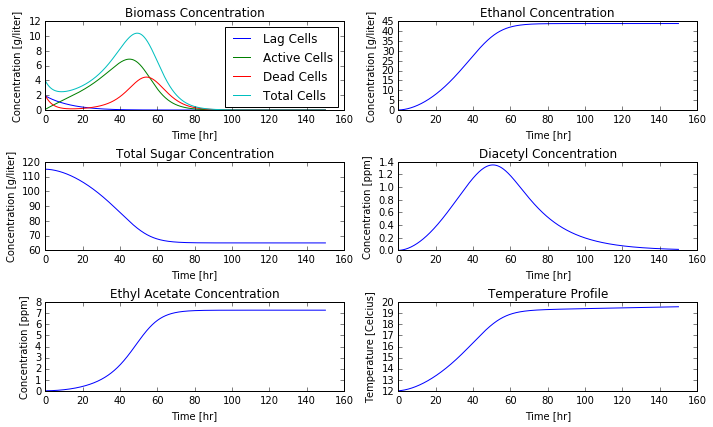

In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Initial Conditions
vol = 7040.866 #in liters (1860 gallons)- Fermentation Tank Volume
H_rxn = 587  #J/g_glucose - Heat of reaction between yeast and glucose
rho_wort = 1060  #grams/liter - density of wort
Cp_wort = 4 #J/g*K - Specific heat of wort 
Uamb = .48*3600 #J/m^2*K*hr - Overall heat transfer Coefficient for an insultated fermentation vessel
Aamb = 10.602875 #m^2 - Interfacial Contact Area based on tank volume
Tamb = 25+273.15 #kelvin - Ambient Temperature
Temp_0 =12+273.15 #kelvin - Initial Temperature


total_biomass=4 #g/L - Initial yeast innoculation
s_0=115 #g/L - Initial Sugar concentration

IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0] 
    #[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp]
t = np.linspace(0,150,5000)

# Differential Equations derived in Theoretical Development
def xdot(x,t):
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp = x
    #Arrhenius Kinetics
    mu_x0 = 1.095E47*np.exp(-63720/(1.99536*Temp))
    k_m = 3.373E56*np.exp(-76450/(1.99536*Temp))
    mu_eas = 1.129E39*np.exp(-53056/(1.99536*Temp))
    mu_D0 = 4.889E14*np.exp(-20020/(1.99536*Temp))
    mu_s0 = 6.232E-19*np.exp(23254/(1.99536*Temp))
    mu_a0 = 26.3865*np.exp(-2528.6/(1.99536*Temp))
    mu_lag = 2.2041E13*np.exp(-18959/(1.99536*Temp))
    k_s = 1.1081E-52*np.exp(68249.2/(1.99536*Temp))
    k_dc = 0.000127672
    k_dm = 0.00113864
    #Fermentation Process
    dX_lag = -mu_lag*X_lag
    dX_act = (mu_x0*S)/(0.5*s_0+E)*X_act - k_m*X_act + mu_lag*X_lag
    dX_dead = k_m*X_act - (0.5*s_0*mu_D0)/(0.5*s_0+E) * X_dead
    dS = -(mu_s0*S)/(k_s+S)*X_act
    dE = (mu_a0*S)/(k_s+S)*(1-E/(0.5*s_0))*X_act
    dAcet = mu_eas*(mu_s0*S)/(k_s+S)*X_act
    dDiac = k_dc*S*X_act - k_dm*Diac*E
    #Energy Balance for no control 
    dTemp = -H_rxn*dS/rho_wort/Cp_wort + Uamb*Aamb/rho_wort/Cp_wort/vol*(Tamb-Temp)
    
    return [dX_lag,dX_act,dX_dead,dS,dE,dAcet,dDiac,dTemp]

def sim(t,IC):
    sol = odeint(xdot,IC,t) # solve system of differential equations using odeint
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp  = sol.transpose()
    return [X_lag,X_act,X_dead,S,E,Acet,Diac,Temp]

        
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp = sim(t,IC)

# Visualization 
def plotsim(X_lag,X_act,X_dead,S,E,Acet,Diac,Temp):
    plt.figure(figsize=(10,6))
    plt.subplot(3,2,1)
    plt.plot(t,X_lag,t,X_act,t,X_dead,t,X_lag + X_act + X_dead)
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Biomass Concentration')
    plt.legend(['Lag Cells','Active Cells','Dead Cells', 'Total Cells'])
    

    plt.subplot(3,2,3)
    plt.plot(t,S)
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Total Sugar Concentration')
    

    plt.subplot(3,2,2)
    plt.plot(t,E)
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Ethanol Concentration')
    
    
    plt.subplot(3,2,4)
    plt.plot(t,Diac)
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [ppm]')
    plt.title('Diacetyl Concentration')
    
    plt.subplot(3,2,5)
    plt.plot(t,Acet)
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [ppm]')
    plt.title('Ethyl Acetate Concentration')
    plt.tight_layout()
    
    plt.subplot(3,2,6)
    plt.plot(t,Temp-273.15)
    plt.xlabel('Time [hr]')
    plt.ylabel('Temperature [Celcius]')
    plt.title('Temperature Profile')
    plt.tight_layout()


plotsim(X_lag,X_act,X_dead,S,E,Acet,Diac,Temp)

#Record Steady State values for further analysis
SS_Lager_NoControl = [S[len(S)-1],E[len(E)-1],Acet[len(Acet)-1],Diac[len(Diac)-1]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Lager_NoControl[0]) + " g/L.")
print("Ethanol- " + str(SS_Lager_NoControl[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Lager_NoControl[2]) + " ppm.")
print("Diacetyl- " + str(SS_Lager_NoControl[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
count=0
for x in E:
    if x >= .95*SS_Lager_NoControl[1]:
        ethanol_time = t[count]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time) + " hours to produce 95% of the ethanol.")

### Simulation 2- Lager batch process with isothermal temperature control 
The below simulation is for a lager batch process with isothermal temperature control. For this case, all the sugar is consumed, resulting in a higher ethanol content. 

The steady state concentrations of the major chemical components are: 
Sugar- 3.52158238109e-12 g/L.
Ethanol- 47.7249582373 g/L.
Ethyl Acetate- 4.13868765407 ppm.
Diacetyl- 0.0204542476766 ppm.
 
It takes 88.55 hours to produce 95% of the ethanol.


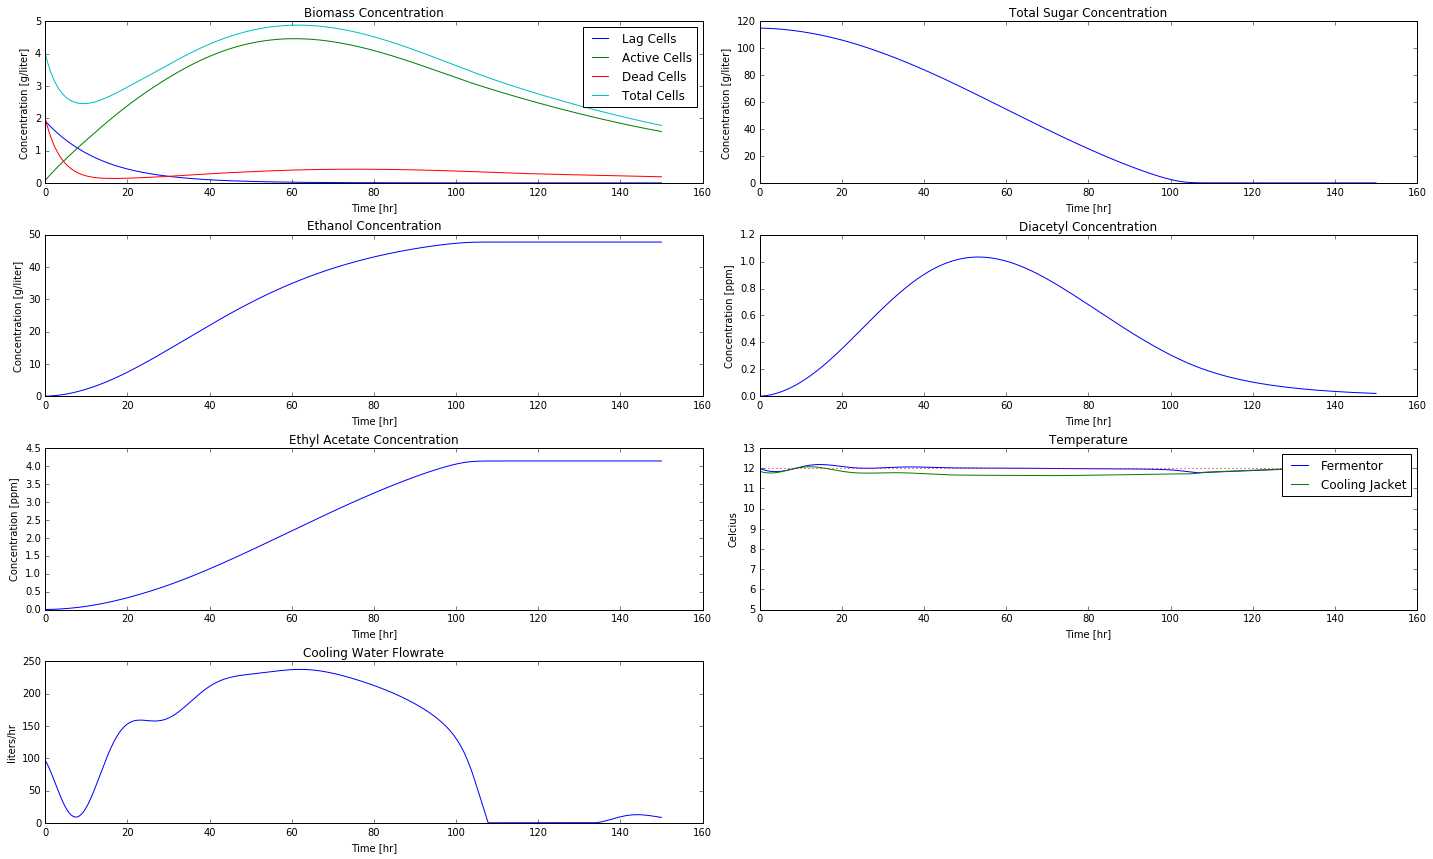

In [19]:
# setpoint
Tsp = 12+273.15
total_biomass=4 #g/L - yeast innoculation 
s_0=115 #g/L - initial sugar concentration

rho_water = 1000.0  # grams/liter - density of water 
Cp_water = 4.180 #J/g*K - specific heat capacity of water 
Uc = 500*3600 #J/m^2*K*hr - Overall heat transfer between fermentation vessel and cooling jacket
Ac = 9.660397 #m^2 - contact area between fermenation vessel and cooling jacket
Tcf = 5+273.15 #kelvin - temperature of water in cooling jacket
Temp_0 =12+273.15 #kelvin - intitial temperature 
qc=100 #L/hr - cooling jacket flow rate
Vc = 14.479993 #L -  Volume of the cooling jacket
IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0,Tcf] 
    #[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,Tf]

# Differential Equations derived in Theoretical Development 
def xdot_control(x,t):
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = x
    #Arrhenius Kinetics
    mu_x0 = 1.095E47*np.exp(-63720/(1.99536*Temp))
    k_m = 3.373E56*np.exp(-76450/(1.99536*Temp))
    mu_eas = 1.129E39*np.exp(-53056/(1.99536*Temp))
    mu_D0 = 4.889E14*np.exp(-20020/(1.99536*Temp))
    mu_s0 = 6.232E-19*np.exp(23254/(1.99536*Temp))
    mu_a0 = 26.3865*np.exp(-2528.6/(1.99536*Temp))
    mu_lag = 2.2041E13*np.exp(-18959/(1.99536*Temp))
    k_s = 1.1081E-52*np.exp(68249.2/(1.99536*Temp))
    k_dc = 0.000127672
    k_dm = 0.00113864
    #Fermentation Process
    dX_lag = -mu_lag*X_lag
    dX_act = (mu_x0*S)/(0.5*s_0+E)*X_act - k_m*X_act + mu_lag*X_lag
    dX_dead = k_m*X_act - (0.5*s_0*mu_D0)/(0.5*s_0+E) * X_dead
    dS = -(mu_s0*S)/(k_s+S)*X_act
    dE = (mu_a0*S)/(k_s+S)*(1-E/(0.5*s_0))*X_act
    dAcet = mu_eas*(mu_s0*S)/(k_s+S)*X_act
    dDiac = k_dc*S*X_act - k_dm*Diac*E
    #Energy Balances with control 
    dTemp = -H_rxn*dS/rho_wort/Cp_wort + Uc*Ac/rho_wort/Cp_wort/vol*(T_c-Temp)
    dT_c = qc/Vc*(Tcf-T_c)+ Uc*Ac/rho_water/Cp_water/Vc*(Temp-T_c) + Uamb*Aamb/rho_water/Cp_water/Vc*(Tamb-T_c)
    
    return [dX_lag,dX_act,dX_dead,dS,dE,dAcet,dDiac,dTemp,dT_c]

# do simulation at fixed time steps dt
dt = 0.05
ti = 0.0
tf = 150

# control saturation
qc_min = 0                            # minimum possible coolant flowrate
qc_max = 500 #L/hr                        # maximum possible coolant flowrate
def sat(qc):                          # function to return feasible value of qc
    return max(qc_min,min(qc_max,qc))

# control parameters
kp = 115.2
ki = 90
kd = 22.5
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = IC
qc = 100 # cooling water flow 

eP_ = beta*Tsp - Temp
eD_ = gamma*Tsp - Temp
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Tsp - Temp
    eI = Tsp - Temp
    eD = gamma*Tsp - Temp
    qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    qc = sat(qc)
    
    # log data and update state
    log.append([t,X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c,qc]) # log data for later plotting
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = \
        odeint(xdot_control,[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c],[t,t+dt])[-1]
        # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

# Visualization
def qplot(log):
    log = np.asarray(log).T
    plt.figure(figsize=(20,12))
    plt.subplot(4,2,1)
    plt.plot(log[0],log[1],log[0],log[2],log[0],log[3],log[0],log[1]+log[2]+log[3])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Biomass Concentration')
    plt.legend(['Lag Cells','Active Cells','Dead Cells', 'Total Cells'])

    plt.subplot(4,2,2)
    plt.plot(log[0],log[4])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Total Sugar Concentration')
    

    plt.subplot(4,2,3)
    plt.plot(log[0],log[5])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Ethanol Concentration')
    
    plt.subplot(4,2,4)
    plt.plot(log[0],log[7])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [ppm]')
    plt.title('Diacetyl Concentration')
    
    plt.subplot(4,2,5)
    plt.plot(log[0],log[6])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [ppm]')
    plt.title('Ethyl Acetate Concentration')
    
    plt.subplot(4,2,6)
    plt.plot(log[0],log[8]-273.15,log[0],log[9]-273.15)
    if 'Tsp' in globals():
        plt.plot(plt.xlim(),[Tsp-273.15,Tsp-273.15],'r:')
    plt.title('Temperature')
    plt.ylabel('Celcius')
    plt.xlabel('Time [hr]')
    plt.legend(['Fermentor','Cooling Jacket'])

    plt.subplot(4,2,7)
    plt.plot(log[0],log[10])
    plt.title('Cooling Water Flowrate')
    plt.ylabel('liters/hr')
    plt.xlabel('Time [hr]')
    plt.tight_layout()
    
#Record Steady State values for further analysis
qplot(log)
SS_Lager_Control = [log[len(log)-1][4],log[len(log)-1][5],log[len(log)-1][6],log[len(log)-1][7]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Lager_Control[0]) + " g/L.")
print("Ethanol- " + str(SS_Lager_Control[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Lager_Control[2]) + " ppm.")
print("Diacetyl- " + str(SS_Lager_Control[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
D = np.transpose(log)
count=0
for x in D[5]:
    if x >= .95*SS_Lager_Control[1]:
        ethanol_time2 = log[count][0]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time2) + " hours to produce 95% of the ethanol.")


### Simulation 3- Lager batch process with industrial temperature control- Option 1
The below simulation is for industrial temperature control according to the first temperature profile. This simulation resulted in the highest diacetyl concentration. 

The steady state concentrations of the major chemical components are: 
Sugar- 0.00643065344399 g/L.
Ethanol- 51.6401232785 g/L.
Ethyl Acetate- 7.07424260962 ppm.
Diacetyl- 0.0281530241113 ppm.
 
It takes 95.0 hours to produce 95% of the ethanol.


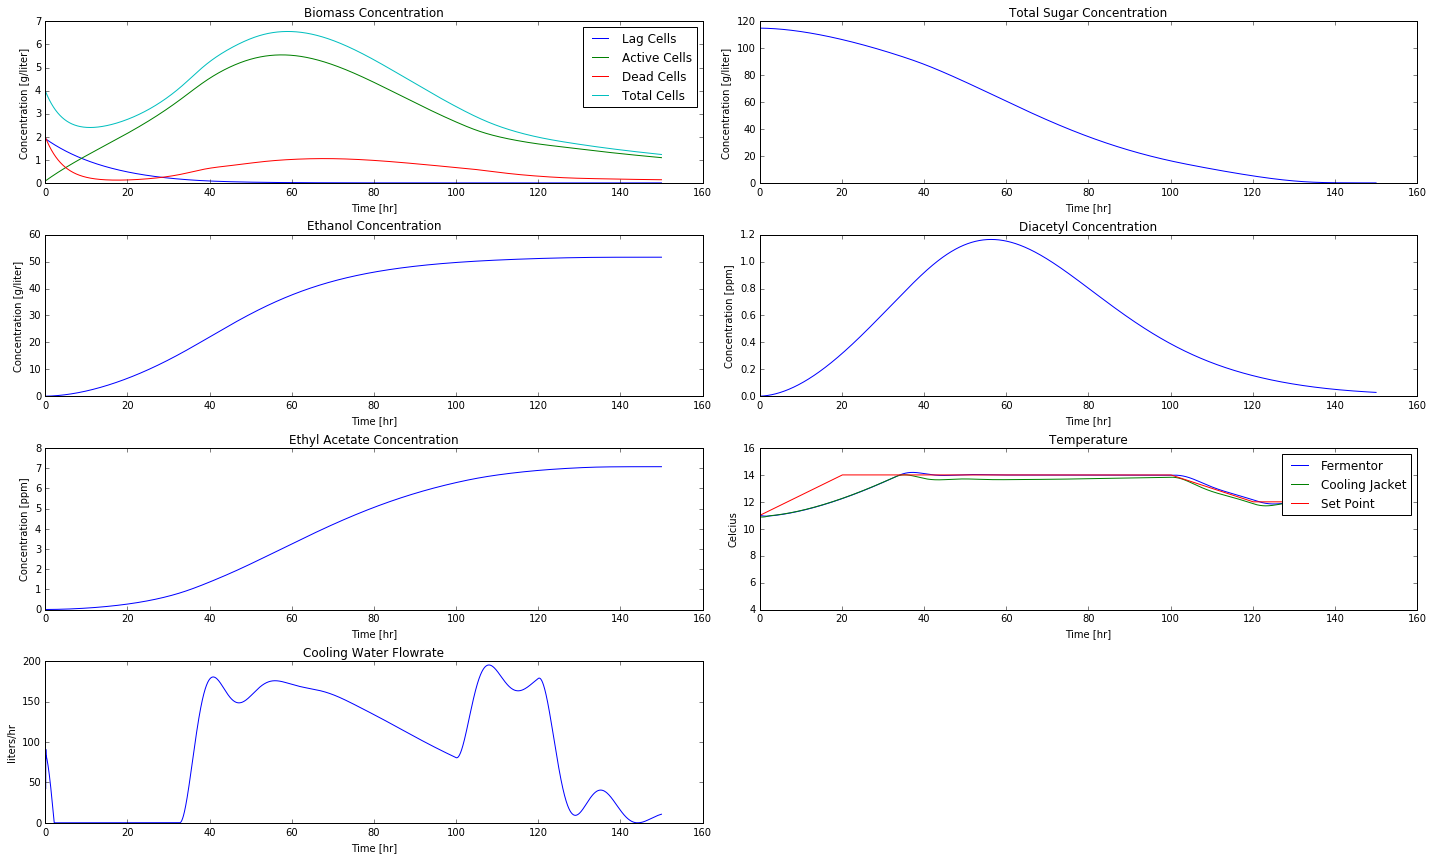

In [20]:
# setpoint
Tsp = 11+273.15 # kelvin - initial set point
total_biomass=4 #g/L
s_0=115 #g/L

Temp_0 =11+273.15 #kelvin - initial temperature
IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0,Tcf] 
    #[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,Tf]

# do simulation at fixed time steps dt
dt = 0.05
ti = 0.0
tf = 150


# control parameters
kp = 256
ki = 200
kd = 180
beta = 0
gamma = 0


# create python list to log results
log = []

# start simulation
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = IC
qc = 100 # cooling jacket flow rate

eP_ = beta*Tsp - Temp
eD_ = gamma*Tsp - Temp
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c,qc,Tsp]) # log data for later plotting
    
    # PID control calculations
    # Create if statements that perform set point changes at certain values of time. 
    if log[len(log)-1][0]<20:    # for time<20, the set point is (11+273.15)+.15*time
        Tsp = (11+273.15)+.15*log[len(log)-1][0] 
    elif log[len(log)-1][0]<100: # for 20<time<100, the set point is (14+273.15)
        Tsp = 14+273.15
    elif log[len(log)-1][0]<120: # for 100<time<120, the set point is (14+273.15)-.1*(time-100)
        Tsp = (14+273.15)+-.1*(log[len(log)-1][0]-100)
    else:                        # for time>120, the set point is (12+273.15)
        Tsp = (12+273.15)
    
    # PID control calculations
    eP = beta*Tsp - Temp
    eI = Tsp - Temp
    eD = gamma*Tsp - Temp
    qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    qc = sat(qc)
    
    # log data and update state
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = \
        odeint(xdot_control,[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c],[t,t+dt])[-1]
        # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP

#visualization
def qplotind(log):
    log = np.asarray(log).T
    plt.figure(figsize=(20,12))
    plt.subplot(4,2,1)
    plt.plot(log[0],log[1],log[0],log[2],log[0],log[3],log[0],log[1]+log[2]+log[3])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Biomass Concentration')
    plt.legend(['Lag Cells','Active Cells','Dead Cells', 'Total Cells'])

    plt.subplot(4,2,2)
    plt.plot(log[0],log[4])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Total Sugar Concentration')
    

    plt.subplot(4,2,3)
    plt.plot(log[0],log[5])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [g/liter]')
    plt.title('Ethanol Concentration')
    
    plt.subplot(4,2,4)
    plt.plot(log[0],log[7])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [ppm]')
    plt.title('Diacetyl Concentration')
    
    plt.subplot(4,2,5)
    plt.plot(log[0],log[6])
    plt.xlabel('Time [hr]')
    plt.ylabel('Concentration [ppm]')
    plt.title('Ethyl Acetate Concentration')
    
    plt.subplot(4,2,6)
    plt.plot(log[0],log[8]-273.15,log[0],log[9]-273.15,log[0],log[11]-273.15)
    plt.title('Temperature')
    plt.ylabel('Celcius')
    plt.xlabel('Time [hr]')
    plt.legend(['Fermentor','Cooling Jacket','Set Point'])

    plt.subplot(4,2,7)
    plt.plot(log[0],log[10])
    plt.title('Cooling Water Flowrate')
    plt.ylabel('liters/hr')
    plt.xlabel('Time [hr]')
    plt.tight_layout()

#Record Steady State values for further analysis
qplotind(log)
SS_Ind1_Control = [log[len(log)-1][4],log[len(log)-1][5],log[len(log)-1][6],log[len(log)-1][7]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Ind1_Control[0]) + " g/L.")
print("Ethanol- " + str(SS_Ind1_Control[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Ind1_Control[2]) + " ppm.")
print("Diacetyl- " + str(SS_Ind1_Control[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
D = np.transpose(log)
count=0
for x in D[5]:
    if x >= .95*SS_Ind1_Control[1]:
        ethanol_time3 = log[count][0]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time3) + " hours to produce 95% of the ethanol.")

### Simulation 4- Lager batch process with industial temperature control- Option 2
The below simulation is for industrial temperature control according to the second temperature profile. The results from this simulation were very similar to the results obtained with isothermal temperature control; however, a higher ethanol content was obtained. 

The steady state concentrations of the major chemical components are: 
Sugar- 4.88608815415e-08 g/L.
Ethanol- 51.4430317827 g/L.
Ethyl Acetate- 6.85507007411 ppm.
Diacetyl- 0.0196800980532 ppm.
 
It takes 87.6 hours to produce 95% of the ethanol.


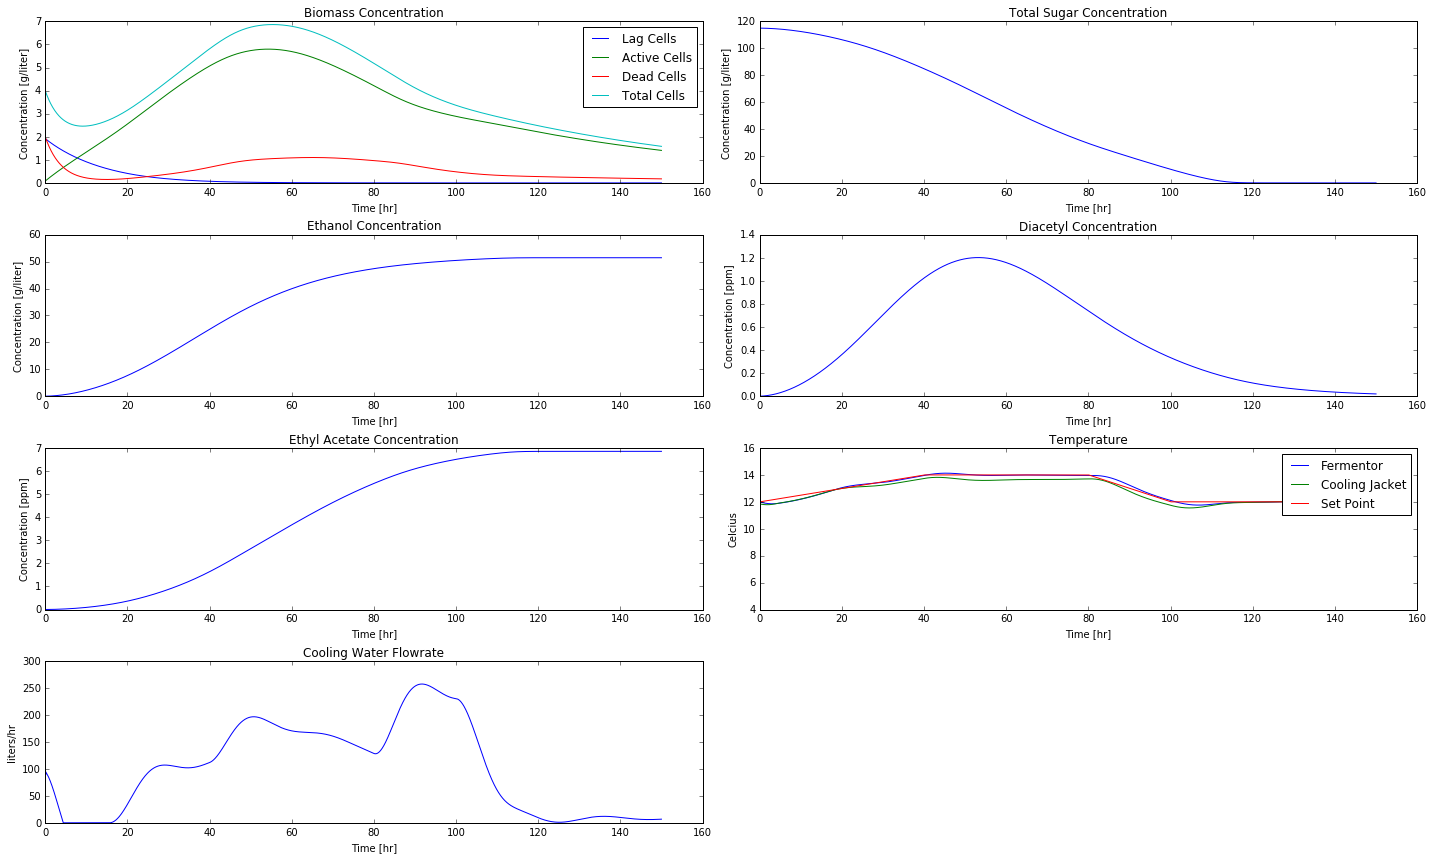

In [21]:
Tsp = 12+273.15 # kelvin - initial set point 
Temp_0 =12+273.15 #kelvin
IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0,Tcf] 
    #[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,Tf]
    
# control parameters
kp = 115.2
ki = 90
kd = 22.5
beta = 0
gamma = 0


# create python list to log results
log = []

# start simulation
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = IC
qc = 100
    
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c,qc,Tsp]) # log data for later plotting
    
    # PID control calculations
    # Create if statements that perform set point changes at certain values of time.
    if log[len(log)-1][0]<40:         # for time<40, the set point is (12+273.15)+.05*time
        Tsp = (12+273.15)+.05*log[len(log)-1][0]
    elif log[len(log)-1][0]<80:       #for 40<time<80, the set point is (14+273.15)
        Tsp = 14+273.15
    elif log[len(log)-1][0]<100:      # for 80<time<100, the set point is (14+273.15)-.1*(time-80)
        Tsp = (14+273.15)+-.1*(log[len(log)-1][0]-80)
    else:                             # for time>100, the set point is (12+273.15)
        Tsp = (12+273.15)
    
    # PID control calculations
    eP = beta*Tsp - Temp
    eI = Tsp - Temp
    eD = gamma*Tsp - Temp
    qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    qc = sat(qc)
    
    # log data and update state
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = \
        odeint(xdot_control,[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c],[t,t+dt])[-1]
        # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP


qplotind(log)

#Record Steady State values for further analysis
SS_Ind2_Control = [log[len(log)-1][4],log[len(log)-1][5],log[len(log)-1][6],log[len(log)-1][7]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Ind2_Control[0]) + " g/L.")
print("Ethanol- " + str(SS_Ind2_Control[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Ind2_Control[2]) + " ppm.")
print("Diacetyl- " + str(SS_Ind2_Control[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
D = np.transpose(log)
count=0
for x in D[5]:
    if x >= .95*SS_Ind2_Control[1]:
        ethanol_time4 = log[count][0]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time4) + " hours to produce 95% of the ethanol.")

### Simulation 5- Lager batch process with industial temperature control- Option 3
The below simulation is for industrial temperature control according to the third temperature profile. This simulation resulted in the highest ethanol concentration. In addition, 95% of the steady state ethanol concentration was produced in a shorter amount when compared to lagers of similar ethanol content. 

The steady state concentrations of the major chemical components are: 
Sugar- 7.07329370205e-05 g/L.
Ethanol- 51.9553432155 g/L.
Ethyl Acetate- 7.44558724787 ppm.
Diacetyl- 0.0191331228817 ppm.
 
It takes 85.95 hours to produce 95% of the ethanol.


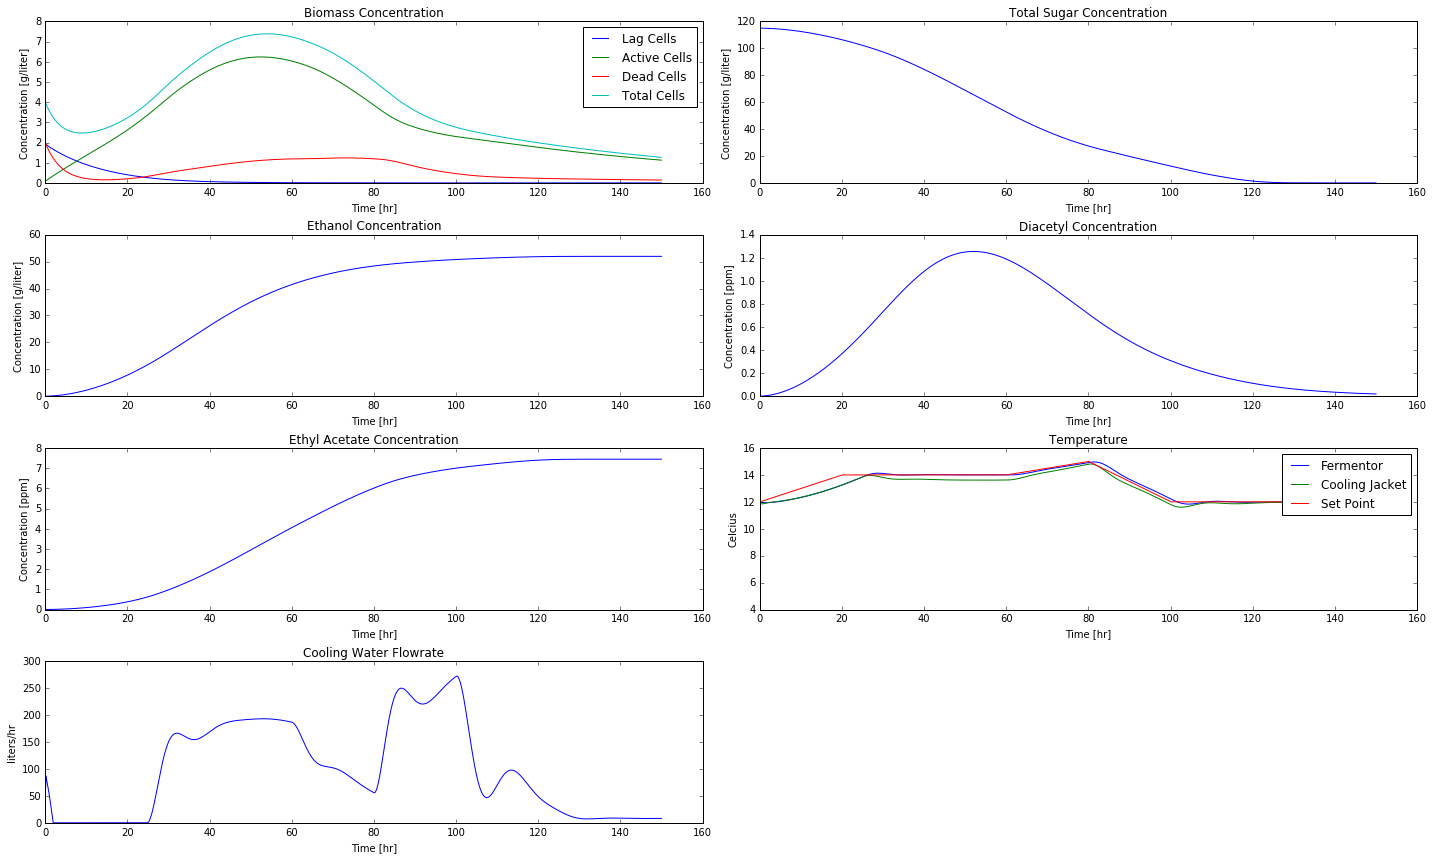

In [22]:
Tsp = 12+273.15 #kelvin - initial set point 
Temp_0 =12+273.15 #kelvin
IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0,Tcf] 
    #[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,Tf]
    
# control parameters
kp = 342
ki = 260
kd = 76
beta = 0
gamma = 0


# create python list to log results
log = []

# start simulation
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = IC
qc = 100
    
for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    log.append([t,X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c,qc,Tsp]) # log data for later plotting
    
    # PID control calculations
    # Create if statements that perform set point changes at certain values of time.
    if log[len(log)-1][0]<20:              # for time<20, the set point is (12+273.15)+.1*time
        Tsp = (12+273.15)+.1*log[len(log)-1][0]
    elif log[len(log)-1][0]<60:            # for 20<time<60, the set point is (14+273.15)
        Tsp = 14+273.15
    elif log[len(log)-1][0]<80:            # for 60<time<80, the set point is (14+273.15)+.05*(time-60)
        Tsp = (14+273.15)+.05*(log[len(log)-1][0]-60)
    elif log[len(log)-1][0]<100:           # for 80<time<100, the set point is (15+273.15)-.15*(time-80)
        Tsp = (15+273.15)+-.15*(log[len(log)-1][0]-80)
    else:                                  # for time>100, the set point is (12+273.15)
        Tsp = (12+273.15)
    
    # PID control calculations
    eP = beta*Tsp - Temp
    eI = Tsp - Temp
    eD = gamma*Tsp - Temp
    qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    qc = sat(qc)
    
    # log data and update state
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = \
        odeint(xdot_control,[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c],[t,t+dt])[-1]
        # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP


qplotind(log)

#Record Steady State values for further analysis
SS_Ind3_Control = [log[len(log)-1][4],log[len(log)-1][5],log[len(log)-1][6],log[len(log)-1][7]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Ind3_Control[0]) + " g/L.")
print("Ethanol- " + str(SS_Ind3_Control[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Ind3_Control[2]) + " ppm.")
print("Diacetyl- " + str(SS_Ind3_Control[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
D = np.transpose(log)
count=0
for x in D[5]:
    if x >= .95*SS_Ind3_Control[1]:
        ethanol_time5 = log[count][0]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time5) + " hours to produce 95% of the ethanol.")

### Simulation 6- Ale batch process with no control
The below simulation is for an ale with no temperature control. The temperature effects are minimal since the vessel temperature only raises about 3 degrees celcius. 

The steady state concentrations of the major chemical components are: 
Sugar- 95.1735054434 g/L.
Ethanol- 41.9115066441 g/L.
Ethyl Acetate- 14.383299227 ppm.
Diacetyl- 0.00380398671172 ppm.
 
It takes 14.5529105821 hours to produce 95% of the ethanol.


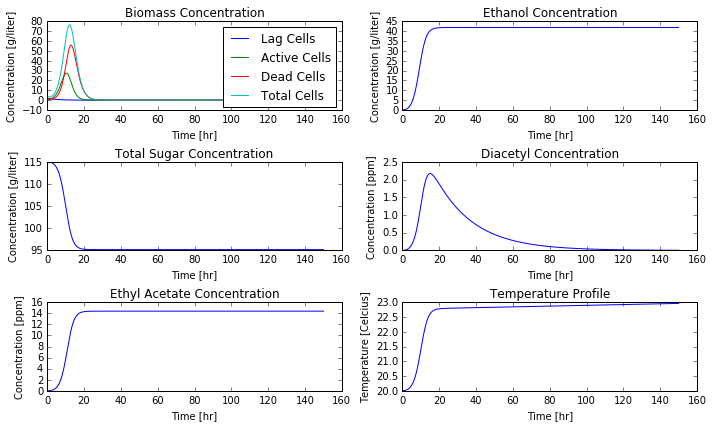

In [23]:
Temp_0 =20+273.15 #kelvin - initial temperature
total_biomass=4 #g/L
s_0=115 #g/L
t = np.linspace(0,150,5000)
IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0] 
    #[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp]
    
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp = sim(t,IC)
plotsim(X_lag,X_act,X_dead,S,E,Acet,Diac,Temp)

#Record Steady State values for further analysis
SS_Ale_NoControl = [S[len(S)-1],E[len(E)-1],Acet[len(Acet)-1],Diac[len(Diac)-1]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Ale_NoControl[0]) + " g/L.")
print("Ethanol- " + str(SS_Ale_NoControl[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Ale_NoControl[2]) + " ppm.")
print("Diacetyl- " + str(SS_Ale_NoControl[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
count=0
for x in E:
    if x >= .95*SS_Ale_NoControl[1]:
        ethanol_time6 = t[count]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time6) + " hours to produce 95% of the ethanol.")

### Simulation 7- Ale batch process with isothermal temperature control 
The below simulation is for an ale with isothermal temperature control. This simulation resulted in a higher ethanol and ethyl acetate concentrations than the uncontrolled ale. 

The steady state concentrations of the major chemical components are: 
Sugar- 72.9077118903 g/L.
Ethanol- 51.4907075073 g/L.
Ethyl Acetate- 19.7874248276 ppm.
Diacetyl- 0.00182426283334 ppm.
 
It takes 21.2 hours to produce 95% of the ethanol.


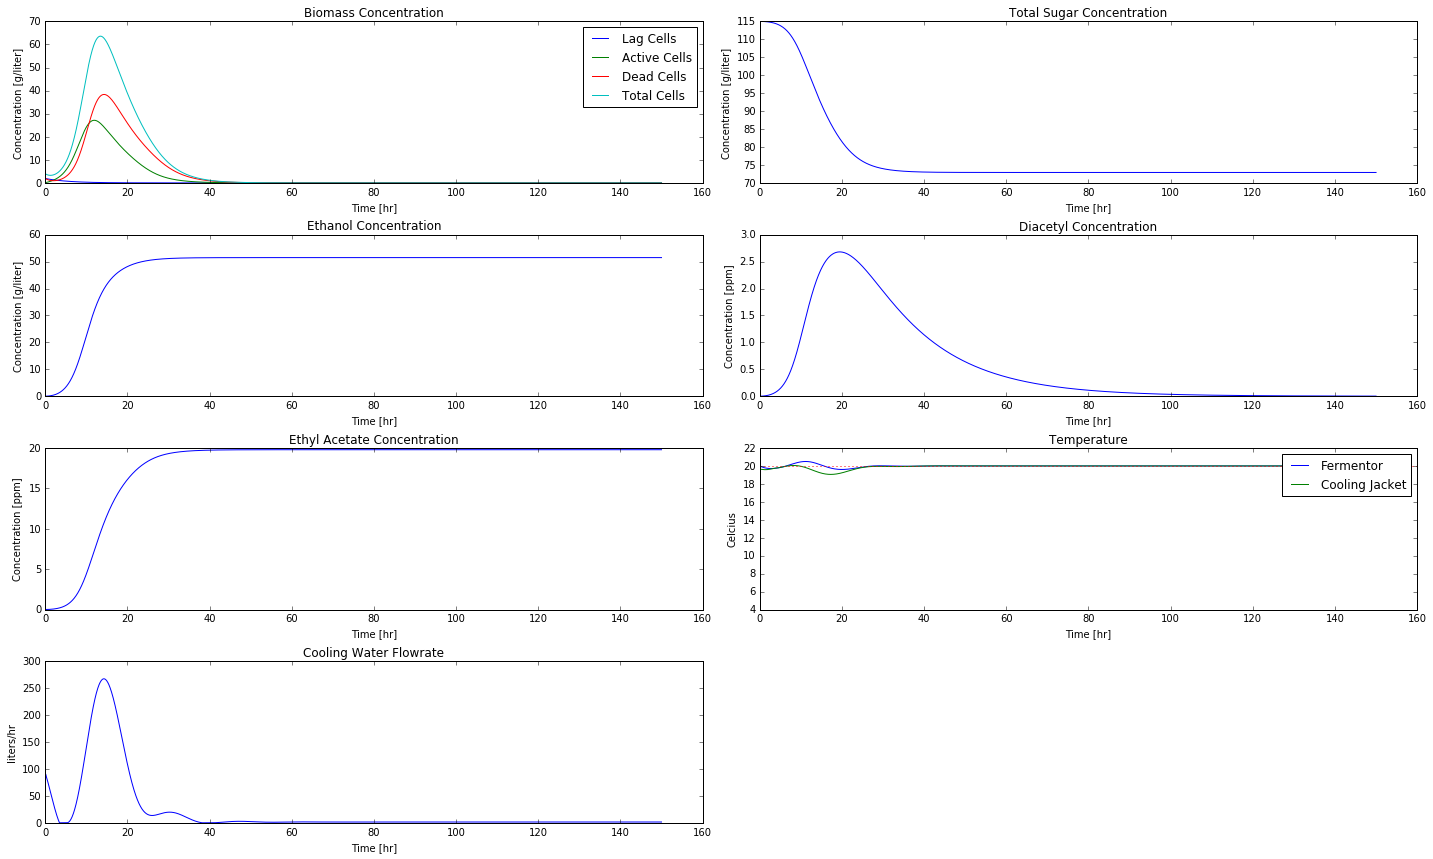

In [24]:
# setpoint
Tsp = 20+273.15 #kelvin - set point
Temp_0 =20+273.15 #kelvin - initial temperature
total_biomass=4 #g/L
s_0=115 #g/L

IC =[.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0,Tcf] 

# control parameters
kp = 115.2
ki = 90
kd = 22.5
beta = 0
gamma = 0

# create python list to log results
log = []

# start simulation
X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = IC
qc = 100

eP_ = beta*Tsp - Temp
eD_ = gamma*Tsp - Temp
eD__ = eD_

for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
    # PID control calculations
    eP = beta*Tsp - Temp
    eI = Tsp - Temp
    eD = gamma*Tsp - Temp
    qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
    qc = sat(qc)
    
    # log data and update state
    log.append([t,X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c,qc]) # log data for later plotting
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = \
        odeint(xdot_control,[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c],[t,t+dt])[-1]
        # start at t, find state at t + dt
    
    # save data for PID calculations
    eD__ = eD_
    eD_ = eD
    eP_ = eP
    


qplot(log)

#Record Steady State values for further analysis
SS_Ale_Control = [log[len(log)-1][4],log[len(log)-1][5],log[len(log)-1][6],log[len(log)-1][7]]
print("The steady state concentrations of the major chemical components are: ")
print("Sugar- " + str(SS_Ale_Control[0]) + " g/L.")
print("Ethanol- " + str(SS_Ale_Control[1]) + " g/L.")
print("Ethyl Acetate- " + str(SS_Ale_Control[2]) + " ppm.")
print("Diacetyl- " + str(SS_Ale_Control[3]) + " ppm.")

# Record time to produce 95% of the max ethanol concentration
D = np.transpose(log)
count=0
for x in D[5]:
    if x >= .95*SS_Ale_Control[1]:
        ethanol_time7 = log[count][0]
        break
    count+=1
print(" ")
print("It takes " + str(ethanol_time7) + " hours to produce 95% of the ethanol.")

### Simulation 8- Interactive for tuning use 
The below simulation was used to find appropriate values of $k_p$, $k_i$, and $k_d$ for each of the above simulations.

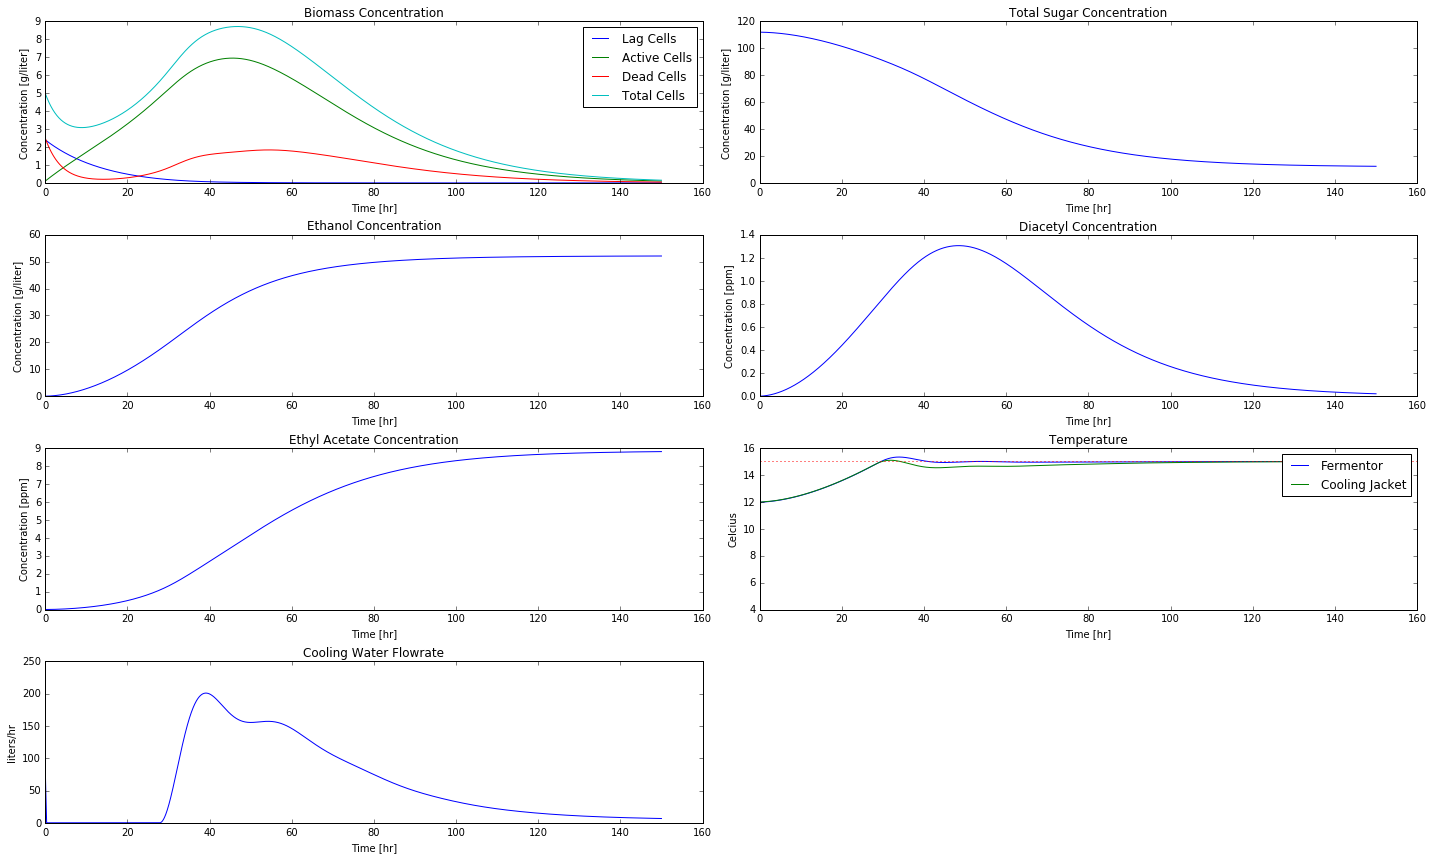

In [25]:
from ipywidgets import interact
 

def sim(Tsetpoint,kp,ki,kd,total_biomass,s_0):
    global Tsp, qc
    Tsp = Tsetpoint+273.15
    Temp_0=12+273.15 #kelvin - initial temperature
    IC = [.48*total_biomass,.02*total_biomass,.5*total_biomass,s_0,0,0,0,Temp_0,Tcf] 
    # control parameters
    beta = 0
    gamma = 0

    # create python list to log results
    log = []

    # start simulation
    X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = IC
    qc = 100 # cooling jacket flow rate

    eP_ = beta*Tsp - Temp
    eD_ = gamma*Tsp - Temp
    eD__ = eD_

    for t in np.linspace(ti,tf,int((tf-ti)/dt)+1):
        # PID control calculations
        eP = beta*Tsp - Temp
        eI = Tsp - Temp
        eD = gamma*Tsp - Temp
        qc -= kp*(eP - eP_) + ki*dt*eI + kd*(eD - 2*eD_ + eD__)/dt
        qc = sat(qc)

        # log data and update state
        log.append([t,X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c,qc]) # log data for later plotting
        X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c = \
            odeint(xdot_control,[X_lag,X_act,X_dead,S,E,Acet,Diac,Temp,T_c],[t,t+dt])[-1]
        # start at t, find state at t + dt
        
        # save data for PID calculations
        eD__ = eD_
        eD_ = eD
        eP_ = eP

    qplot(log)
    
interact(sim,Tsetpoint = (10,20),kp = (0,250), ki=(0,160), kd=(0,10), total_biomass=(0,10),s_0=(25,200));

## Part 5: Conclusion and Summary

After comparing the steady state concentrations of the various simulations, it was apparent that the use of a cooling jacket was necessary to achieve the desired beer profile. Without the use of a temperature controller via a cooling jacket, the concentration of sugar, ethanol, ethyl acetate and diacetyl acetate were uncontrollable. For both the lager and ale, the uncontolled fermentation resulted in a significantly reduced ethanol concentration. It is also crucial to note that there are several phases of temperature profiles, especially for lagers, where the temperature of the fermentation tank must be changed to vary the concentrations of ethyl acetate and diacetyl.
 
Furthermore, the analysis of the industrial profiles demonstrated that the third industrial lager profile is the most preferable because it had the shortest fermentation time and highest alcohol concentration. This can minimize the cost by reducing the raw materials used since the most ethanol is generated from a set amount of yeast and sugar. The expected concentration profiles found in literature are outlined in the Table 5 of the appendix. The process model that was developed matches up relatively well with the expected concentrations of ethanol and ethyl acetate. However, there is some deviation with respect to sugar and diacetyl. This deviation is expected because there are multiple process steps both before and after the fermentation process that can affect the concentration profiles of the beers. These processes will require separate kinetic and chemical models to properly reflect the actual production process. For the case of sugar, most of the simple sugars are completely consumed after fermentation and they are added back into the beer during later processes.
 
Beyond modeling several other processes, another potential improvement to this simulation could be to change the goal from maintaining the vessel within a set temperature range to minimizing time needed for fermentation or matching the flavor profile. This would require a feedforward loop to predict the flavor profile, where a controller is used to modify the temperature based on the anticipated flavor profile. 

## Part 6: Apendices

                              Table 3: Dimensions for a 1860-Gallon Fermentation Tank
| Volume | 7040 L |
|--------| --------|
|Inner Diameter | 2050 mm |
|Insulation | 75 mm |
|Outside Diameter | 2200 mm |
|Cylindrical Heigth | 1500 mm |
|Total Height | 4227 mm |

The values contained in Table 4, below were calculated using the values found in Table 3 assuming a cylindrical body and a conical bottom. 

                                Table 4: Calculated Contact Surface and Volume Values
| Cylindrical Volume | 4950 L |
|-----------|-----------|
|Cone Volume | 2090 L |
|Volume of Cooling Jacket | 14.4 L |
|Contact Area Inside | 9.66 m^2 |
|Contact Area Outside | 10.6 m^2
| Overall heat transfer Coefficient for cooling jacket to tank | 500 W/m^2 * K|
| Overall heat transfer Coefficient for insulated vessel | 0.48 W/m^2 * K |



                            Table 5: Industrial Component Values for Lagers and Ales
|   | Sugar | Diacetyl | Ethyl Acetate | Ethanol |
|------|------|------|------|-------|
|Lager |  27 g/L   | .04-.08 ppm   |  8-12 ppm  | 32-47 g/L  |
|Ale |   10 g/L |   .08-.4 ppm  | 15-20 ppm    |  39-55 g/L |
The values in the above in Table 5 were composed from information found in Elena, Rodman, and alcoholcontents.com. Note for the case of sugar that all of the simple sugars are usually completely consumed after fermentation. Sugar is added back into the beer during later processes.  

## Part 7: Works Cited 
Andres-Toro, B, Giron-Sierra, J.M, et al. “A Kinetic Model for Beer Production Under Industrial Operational Conditions” Mathematics and Computers in Simulation, 1998, 65-74.

Boutlon, Christopher, and David Quain. Brewing Yeast and Fermentation. Hoboken: Wiley, 2013

Carrillo-Ureta, G. E., P. D. Roberts, and V. M. BecerraÜ. "OPTIMAL CONTROL OF A FERMENTATION PROCESS." http://folk.ntnu.no/skoge/prost/proceedings/ecc03/pdfs/331.pdf.

De Piro, George. “Professor Beer.” Professor_Beer_Diacetyl_Article. Evans Brewing Company,
February 2017.

Elena, Mudura. "RISK MANAGEMENT OF BEER FERMENTATION – DIACETYL CONTROL" Accessed on: 1 May 2017. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=10&ved=0ahUKEwi8yuHy7tbTAhXJ64MKHVAuCqkQFghdMAk&url=http%3A%2F%2Fjournals.usamvcluj.ro%2Findex.php%2Fagriculture%2Farticle%2Fdownload%2F1616%2F1587&usg=AFQjCNHY66E4-KLS2QAjP8sBlc2Iy3SX1g&sig2=Z17fpVSq8ccnyv29PFHYGQ&cad=rja

“Esters.” Beer Sensory Science. Accessed on: 25 April 2017.   https://beersensoryscience.wordpress.com/2011/02/04/esters/

Rodman, Alistair, and Gerogiorgis, Dimitrios. “Multi-objective Process Optimisation of Beer Fermentation via Dynamic Simulation” Food and Bioproducts Processing, 25 March 2016, 255-274. 

